                                        Homework Assignment 2

In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing,svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold , cross_val_score,KFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix


import warnings
warnings.filterwarnings("ignore")

In [2]:
#req data 
cwd=os.getcwd()
directory = r'Targetdata'

In [31]:
os.listdir(directory)

['n02093428-American_Staffordshire_terrier',
 'n02105251-briard',
 'n02107908-Appenzeller',
 'n02113978-Mexican_hairless']

In [33]:
from skimage import filters
from skimage import data, exposure, img_as_float
from skimage.color import rgb2gray
from skimage.io import imread
import numpy as np

def angle(dx, dy):
 """Calculate the angles between horizontal and vertical operators."""
 return np.mod(np.arctan2(dy, dx), np.pi)
hist=[]
label=[]
for index,name in enumerate(os.listdir(directory)):
    for image in os.listdir(os.path.join(directory,name)):
        img = imread(os.path.join(directory,name,image.strip()))
        gray_img = rgb2gray(img)
        angle_sobel = angle(filters.sobel_h(gray_img),filters.sobel_v(gray_img))
        Hist,_=exposure.histogram(angle_sobel, nbins=36)
        hist.append(Hist)
        label.append(index)

In [34]:
X = np.array(hist)
Y = np.array(label)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y,random_state=42)

In [36]:
scaler = preprocessing.StandardScaler().fit(X_train)

In [37]:
X_scaled = scaler.transform(X_train)

In [38]:
X_scaled.mean(axis=0)

array([ 2.01046423e-18,  1.64076220e-16,  6.83557838e-17, -3.72717730e-16,
       -9.98530567e-17, -2.43042787e-16,  2.81911762e-16, -1.56369440e-16,
       -2.73423135e-16, -4.25771647e-16, -2.05960891e-16,  4.77596947e-16,
       -3.64564180e-16, -1.63964527e-16, -1.69772535e-16,  2.39021858e-16,
       -5.87502325e-17,  1.06554604e-16, -2.13667671e-16, -1.65304837e-16,
        1.82728860e-16,  1.62624218e-16,  1.13479537e-16,  4.40515051e-16,
       -4.89659732e-16, -2.56445882e-16, -4.77596947e-16,  1.46540504e-16,
        4.69890167e-16,  2.98784304e-16, -1.31350330e-16, -3.02016404e-16,
       -5.18253001e-17,  4.11028243e-17, -2.62700659e-16, -1.19734314e-16])

In [39]:
X_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

In [40]:
X_test_scaled = scaler.transform(X_test)


In [43]:
#standard 5 fold cross validation
train_errors=[]
val_errors=[]
kf = KFold(n_splits=5, shuffle=True, random_state=42)
k_val=[1,3,5,7,10,20]
for k in k_val:
    knn = KNeighborsClassifier(n_neighbors=k)    
    train = []
    val= []
    for train_idx, val_idx in kf.split(X_scaled):
        x_train, x_val = X_scaled[train_idx], X_scaled[val_idx]
        Y_train, Y_val = y_train[train_idx], y_train[val_idx]
        knn.fit(x_train, Y_train)
        train_pred = knn.predict(x_train)
        val_pred = knn.predict(x_val)
        train_accuracy = accuracy_score(Y_train, train_pred)
        val_accuracy = accuracy_score(Y_val, val_pred)
        train.append(1 - train_accuracy)  
        val.append(1 - val_accuracy) 
    train_errors.append(np.mean(train))
    val_errors.append(np.mean(val))

In [44]:
#stratified 5 fold cross validation
stratified_train_e=[]
stratified_val_e=[]
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for k in k_val:
    knn = KNeighborsClassifier(n_neighbors=k)    
    train = []
    val= []
    for train_idx, val_idx in skf.split(X_scaled,y_train):
        x_train, x_val = X_scaled[train_idx], X_scaled[val_idx]
        Y_train, Y_val = y_train[train_idx], y_train[val_idx]
        knn.fit(x_train, Y_train)
        train_pred = knn.predict(x_train)
        val_pred = knn.predict(x_val)
        train_accuracy = accuracy_score(Y_train, train_pred)
        val_accuracy = accuracy_score(Y_val, val_pred)
        train.append(1 - train_accuracy)  
        val.append(1 - val_accuracy) 
    stratified_train_e.append(np.mean(train))
    stratified_val_e.append(np.mean(val))

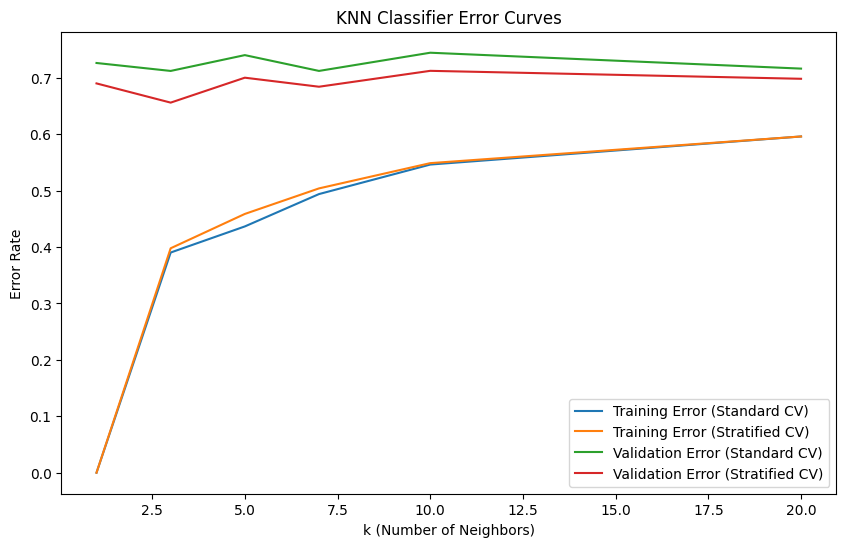

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(k_val, train_errors, label='Training Error (Standard CV)')
plt.plot(k_val, stratified_train_e, label='Training Error (Stratified CV)')
plt.plot(k_val, val_errors, label='Validation Error (Standard CV)')
plt.plot(k_val, stratified_val_e, label='Validation Error (Stratified CV)')

plt.title('KNN Classifier Error Curves')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Error Rate')
plt.legend()

plt.show()

In [50]:
# k=3
Model = KNeighborsClassifier(n_neighbors = 3)
Model.fit(X_scaled, y_train)
p = Model.predict(X_test_scaled)
print("Test error when k=3 :" + str(1-(accuracy_score(y_test,p))))

Test error when k=3 :0.712


MLPClassifier(hidden_layer_sizes=(10, 10, 10))


              precision    recall  f1-score   support

           0       0.31      0.27      0.29        33
           1       0.40      0.55      0.47        31
           2       0.29      0.20      0.24        30
           3       0.42      0.45      0.44        31

    accuracy                           0.37       125
   macro avg       0.36      0.37      0.36       125
weighted avg       0.36      0.37      0.36       125

Mean validation acc: 0.28296774193548385


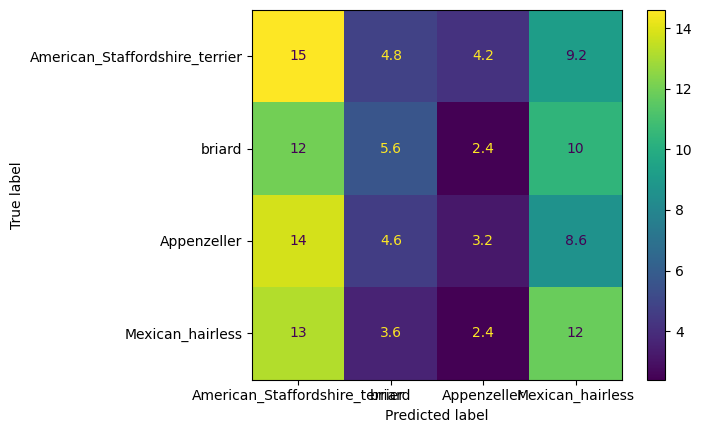

AdaBoostClassifier()


              precision    recall  f1-score   support

           0       0.16      0.18      0.17        33
           1       0.21      0.19      0.20        31
           2       0.27      0.23      0.25        30
           3       0.31      0.32      0.32        31

    accuracy                           0.23       125
   macro avg       0.24      0.23      0.23       125
weighted avg       0.24      0.23      0.23       125

Mean validation acc: 0.30713548387096773


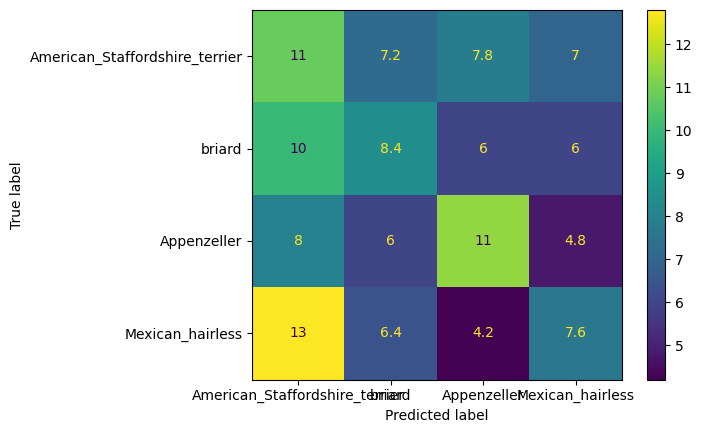

GaussianNB()


              precision    recall  f1-score   support

           0       0.14      0.09      0.11        33
           1       0.31      0.52      0.39        31
           2       0.25      0.03      0.06        30
           3       0.33      0.52      0.40        31

    accuracy                           0.29       125
   macro avg       0.26      0.29      0.24       125
weighted avg       0.26      0.29      0.24       125

Mean validation acc: 0.29588387096774194


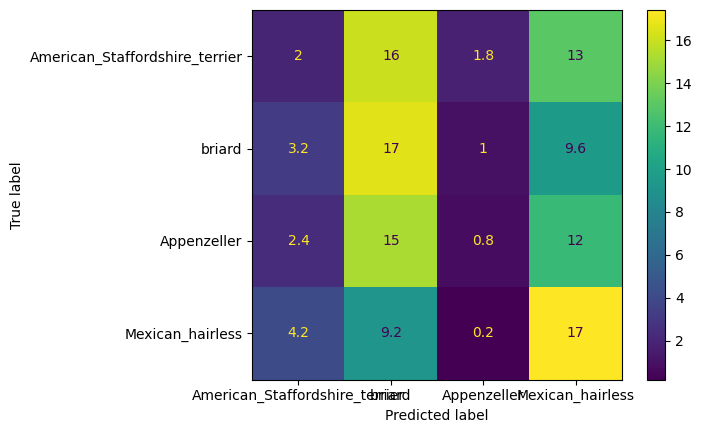

In [51]:
#https://www.w3schools.com/python/python_ml_confusion_matrix.asp

from sklearn import metrics
nn_model=MLPClassifier(hidden_layer_sizes=(10,10,10))
ada= AdaBoostClassifier()
naiveb=GaussianNB()
for clf in [nn_model,ada,naiveb]:
    print(str(clf)+"\n\n")
    clf.fit(X_scaled,y_train)
    predictions=clf.predict(X_test_scaled)
    confusion_matrix = metrics.confusion_matrix(y_test, predictions)
    report=metrics.classification_report(y_test,predictions)
    print(report)
    truelabels,predictlabels,cm,val_a=[],[],[],[]
    for traini,testi in skf.split(X,Y):
        xtrain,xtest=X[traini],X[testi]
        ytrain,ytest=Y[traini],Y[testi]
        
        clf.fit(xtrain,ytrain)
        p=clf.predict(xtest)
        
        truelabels.extend(ytest)
        predictlabels.extend(p)
        val_a.append(metrics.accuracy_score(ytest,p))        
        cm.append(metrics.confusion_matrix(ytest,p))
    print("Mean validation acc: "+str(np.mean(val_a)))
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = sum(cm)/len(cm), display_labels = ['American_Staffordshire_terrier', 'briard', 'Appenzeller','Mexican_hairless'] )
    cm_display.plot()
    plt.show()